# Logistic Regression Model

## Part I: Research Question

### A1. Research Question

Can we use available data to predict features of subscribers at high likelihood for churn?

### A2. Objectives and Goals

The objective of this analysis is to generate a logistic regression model to determine which variables in the provided dataset can predict a subscriber's churn. In this scenario, churn is a binary and dependant variable.  The other provided variables in the dataset will serve as explanatory variables. The goal is to identify which features the stakeholders can focus their efforts on when trying to reduce customer churn.

## Part II: Method Justification

### B1. Summary of Assumptions of a Logistic Regression Model

There are six assumptions a logistic regression model must meet. The first is that the dependent, or target variable is binary.  The second assumption is that the observations within the dataset are independent, and not repeated or related. The third assumption is that there is no multicollinearity. The fourth assumption is that there are no extreme outliers. The fifth assumption is that a linear relationship between the explanatory variables the logit of the target variable exists. The final assumption, is that the sample size is large enough to draw conclusions (Bobbit, 2020).

### B2. Tool Benefits

Python will be used for its readability and the availability of packages and libraries for use in data analysis (Larose & Larose, 2019). The libraries and packages chosen include pandas, StatsModels, Scikit-Learn, PyLab, Matplotlib, numpy, and seaborn. Pandas will be used to import data (Vallisneri, 2018). Utilizing the Matplotlib's plot function is good at creating plots to visualize the data (Larose & Larose, 2019). 

### B3. Logistic Regression as an Appropriate Technique

The goal of this data analysis is to develop a logistic regression model to predict a subscriber's likelihood of churn. Logistic Regression is an appropriate technique as the target variable, Churn, is a binary categorical variable.  If we were trying to predict a continuous variable, such as MonthlyCharge, multiple linear regression would have been an appropriate technique (Reed, 2019).

## Part III: Data Preparation

### C1. Data Preparation Goals and Data Manipulations

The goals of data preparation include identification of data types, detection of missing values, reviewing values of categorical variables, and detection of outliers. Additionally, categorical variables will be checked for spelling errors. Categorical variables will be converted to numeric for ease during the data analysis process.

### C2. Summary Statistics

Please note, for the code, and the visualizations please see section C3 below. 

The churn data contains information on 10,000 customers across various variables.  Unique customer identifiers, customers' geographic location information, customers' jobs were excluded from analysis.

The target variable, Churn, was included in the analysis along with 34 other features: Children, Age, Income, Marital, Gender, MonthlyCharge, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, Bandwidth_GB_Year, and the survey data Items 1 through 8.

The target variable, Churn, is a binary categorical variable. That is, two possible values for the variable are Yes and No. Of the 10,000 records, 7,350 of then have 'No' for this variable, that is the represent a subscriber that did not churn, or leave the company. Of those 10,000, 2,650 of them did churn. 

Among the continuous variables, Children, Income and Yearly_equip_failure and Contacts had positively skewed distributions. Email and Outage_sec_perweek had normal distributions. Age had a uniform distribution. Tenure and Bandwidth_GB_Year had bimodal distributions.

The income ranged from a minimum of approximately \\$350, to a maximum of approximately \\$260,000, with an average mean income of approximately \\$40,000.  The number of children per customer ranged from 0 to 10, with the average being 2.  

The customer ages ranged from 18 to 89, with an average age of around 53 years of age. The tenure, or number of months the customer has been with the provider ranged from 1 month to 72 months, with a mean tenure of approximately 35 months.

The monthly charge ranged from approximately \\$80 to \\$290 per month. The average monthly charge was approximately \\$172 per month. While most customers had phone service, the use of streaming tv and movies was split amongst the customers, with half using the features, and the other half not using them.

### C3. Data Preparation Steps

After importing the necessary packages and libraries, the raw dataset will be imported.

The .info function will be used to view the column names and datatypes.

The total missing values in each column will be calculated using the isnull().sum() function. If necessary, imputation will be performed to replace the missing values with the appropriate mean, median or mode using the .fillna function.

Univariate and bivariate visualizations will be generated to examine the distributions of the variables. Histograms will be created of the continuous variables to view the distributions. To detect outliers, boxplots will be utilized. If necessary to treat outliers, additional analysis will be conducted to determine if the outliers should be removed, retained, excluded or replaced.

Categorical variables will be assessed for unique values, and will later be  encoded for ease during data analysis.

Lastly, the prepared dataset will be extracted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import Ridge, RidgeCV

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Done.")

Done.


In [2]:
churn_df=pd.read_csv('Desktop/WGU/D208/churn_clean.csv')
print("Imported.")

Imported.


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
pd.set_option('display.max_columns', 60)

print("Display size adjusted.")

Display size adjusted.


In [4]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**Assessing for missing values**

In [6]:
churn_df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

No nulls present.

**Viewing summary statistics**

In [7]:
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


**Removing less meaniful information**

In [8]:
churn_df=churn_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'])

In [9]:
churn_df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


Reviewing the categorical columns remaining

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

Checking the categorical columns for unique values and value counts, using the value counts function

In [11]:
churn_df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [12]:
churn_df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [13]:
churn_df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

Our target (dependent) variable is binary.

In [14]:
churn_df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [15]:
churn_df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [16]:
churn_df.Port_modem.value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [17]:
churn_df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [18]:
churn_df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [19]:
churn_df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [20]:
churn_df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [21]:
churn_df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [22]:
churn_df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [23]:
churn_df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [24]:
churn_df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [25]:
churn_df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [26]:
churn_df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [27]:
churn_df.PaperlessBilling.value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [28]:
churn_df.PaymentMethod.value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

### C4. Visualizations of Distributions of Variables

#### Univariate Statistics

In [29]:
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


Viewing histograms of continuous variables

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>],
       [<AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:title={'center':'Item1'}>,
        <AxesSubplot:title={'center':'Item2'}>],
       [<AxesSubplot:title={'center':'Item3'}>,
        <AxesSubplot:title={'center':'Item4'}>,
        <AxesSubplot:title={'center':'Item5'}>,
        <AxesSubplot:title={'center':'Item6'}>],
       [<AxesSubplot:title={'center':'Item7'}>,
        <AxesSubplot:title={'center':'Item8'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

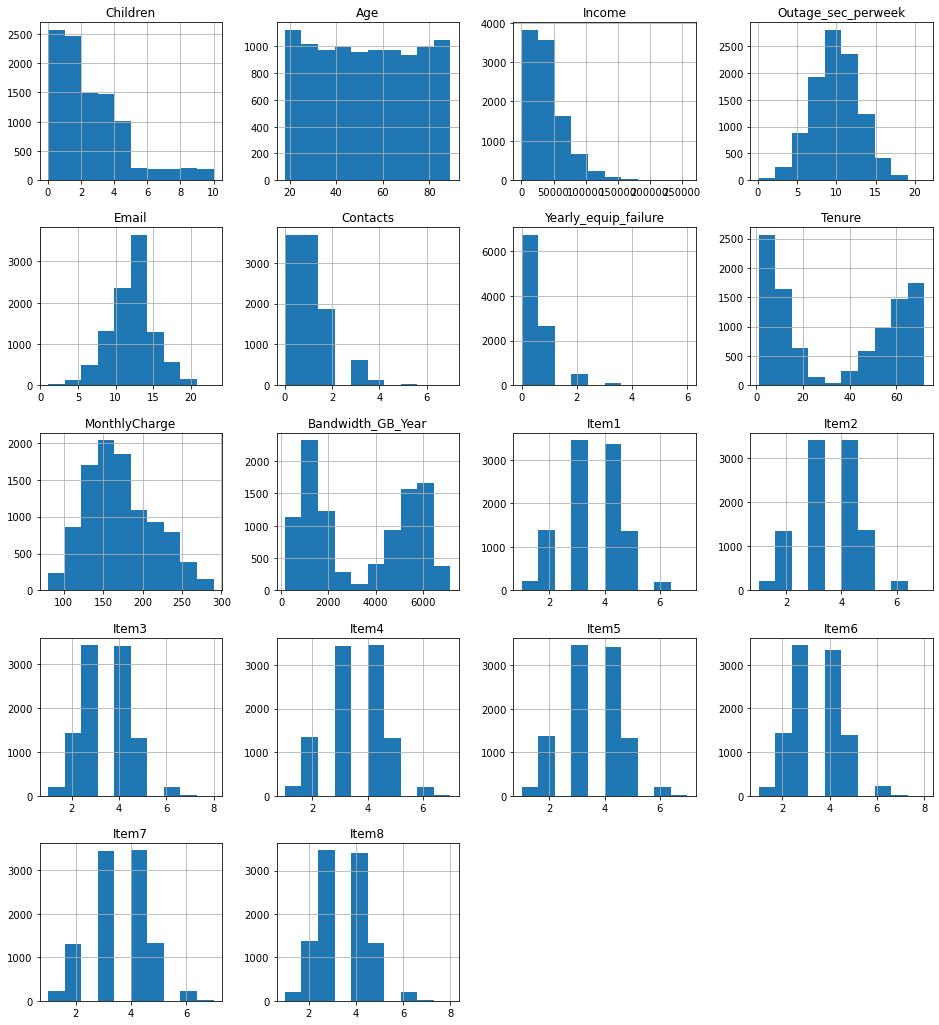

In [133]:
churn_df[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year', 'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']].hist(figsize=(16,18))

Viewing boxplots of continuous variables

<AxesSubplot:xlabel='Children'>

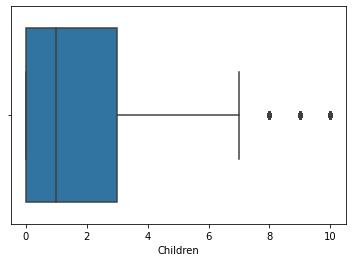

In [31]:
sns.boxplot(x='Children',data=churn_df)

<AxesSubplot:xlabel='Age'>

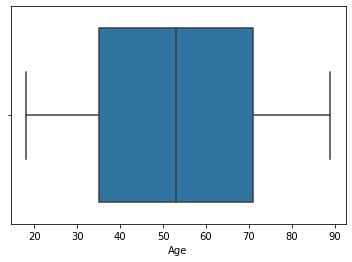

In [32]:
sns.boxplot(x='Age',data=churn_df)

<AxesSubplot:xlabel='Income'>

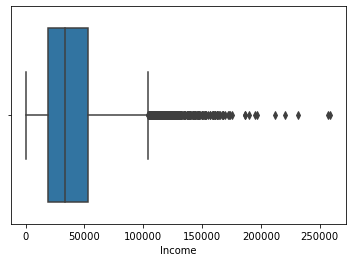

In [33]:
sns.boxplot(x='Income',data=churn_df)

<AxesSubplot:xlabel='Outage_sec_perweek'>

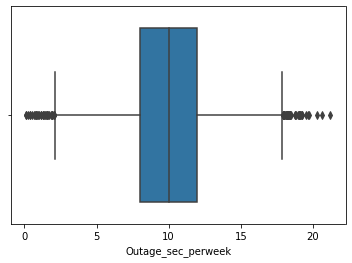

In [34]:
sns.boxplot(x='Outage_sec_perweek',data=churn_df)

<AxesSubplot:xlabel='Email'>

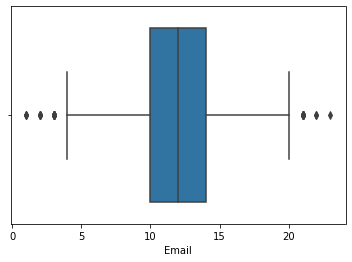

In [35]:
sns.boxplot(x='Email',data=churn_df)

<AxesSubplot:xlabel='Contacts'>

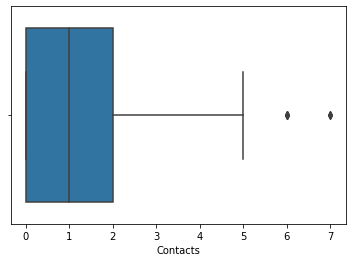

In [36]:
sns.boxplot(x='Contacts',data=churn_df)

<AxesSubplot:xlabel='Yearly_equip_failure'>

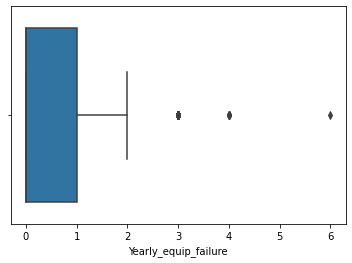

In [37]:
sns.boxplot(x='Yearly_equip_failure',data=churn_df)

<AxesSubplot:xlabel='Tenure'>

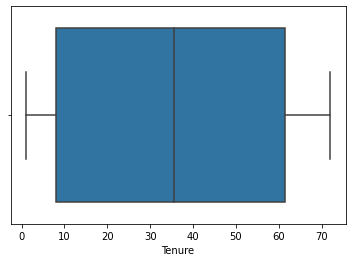

In [38]:
sns.boxplot(x='Tenure',data=churn_df)

<AxesSubplot:xlabel='MonthlyCharge'>

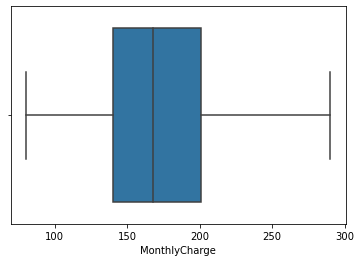

In [39]:
sns.boxplot(x='MonthlyCharge',data=churn_df)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

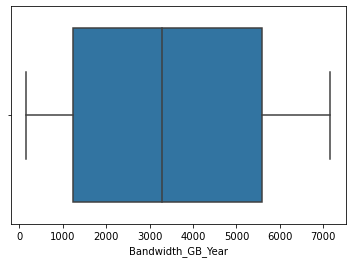

In [40]:
sns.boxplot(x='Bandwidth_GB_Year',data=churn_df)

Viewing bar charts of descriptive variables

<AxesSubplot:xlabel='Marital'>

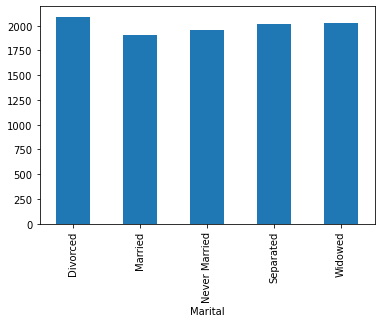

In [41]:
churn_df.groupby('Marital').size().plot.bar()

<AxesSubplot:xlabel='Gender'>

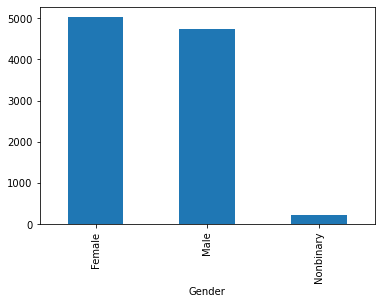

In [42]:
churn_df.groupby('Gender').size().plot.bar()

<AxesSubplot:xlabel='Churn'>

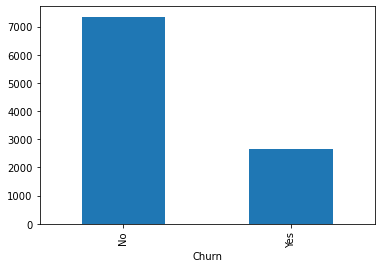

In [43]:
churn_df.groupby('Churn').size().plot.bar()

<AxesSubplot:xlabel='Techie'>

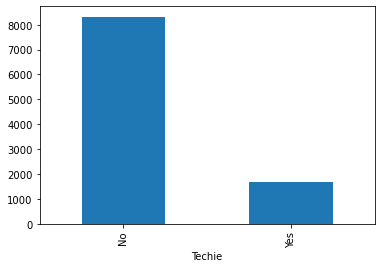

In [44]:
churn_df.groupby('Techie').size().plot.bar()

<AxesSubplot:xlabel='Contract'>

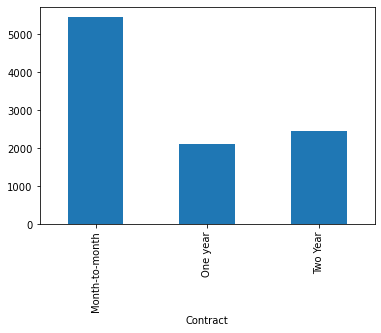

In [45]:
churn_df.groupby('Contract').size().plot.bar()

<AxesSubplot:xlabel='Port_modem'>

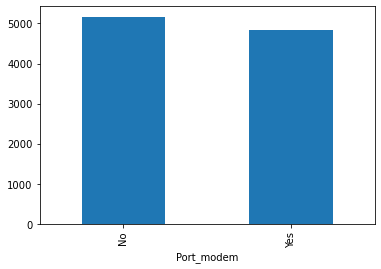

In [46]:
churn_df.groupby('Port_modem').size().plot.bar()

<AxesSubplot:xlabel='Tablet'>

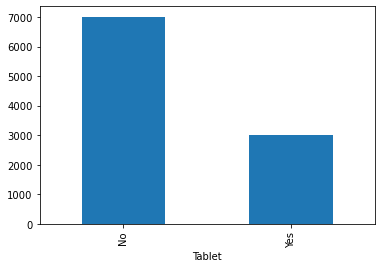

In [47]:
churn_df.groupby('Tablet').size().plot.bar()

<AxesSubplot:xlabel='InternetService'>

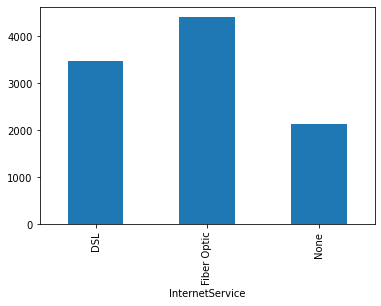

In [48]:
churn_df.groupby('InternetService').size().plot.bar()

<AxesSubplot:xlabel='Phone'>

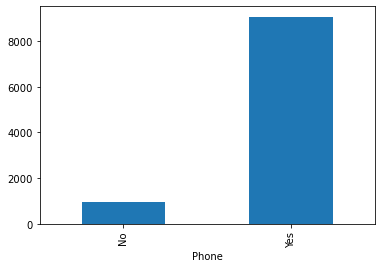

In [49]:
churn_df.groupby('Phone').size().plot.bar()

<AxesSubplot:xlabel='Multiple'>

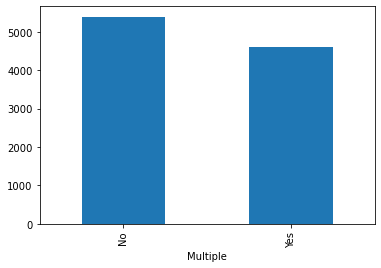

In [50]:
churn_df.groupby('Multiple').size().plot.bar()

<AxesSubplot:xlabel='OnlineSecurity'>

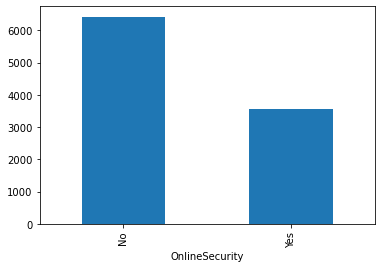

In [51]:
churn_df.groupby('OnlineSecurity').size().plot.bar()

<AxesSubplot:xlabel='OnlineBackup'>

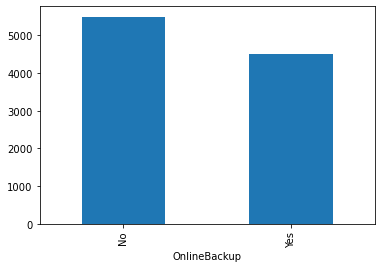

In [52]:
churn_df.groupby('OnlineBackup').size().plot.bar()

<AxesSubplot:xlabel='DeviceProtection'>

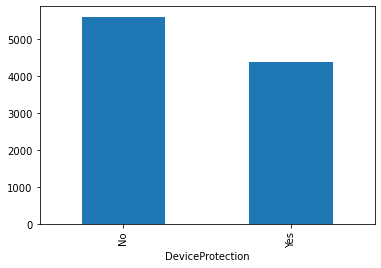

In [53]:
churn_df.groupby('DeviceProtection').size().plot.bar()

<AxesSubplot:xlabel='TechSupport'>

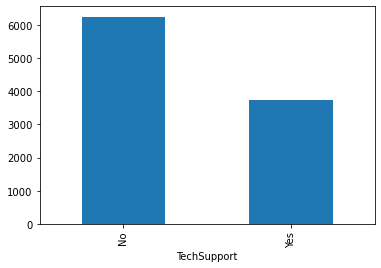

In [54]:
churn_df.groupby('TechSupport').size().plot.bar()

<AxesSubplot:xlabel='StreamingTV'>

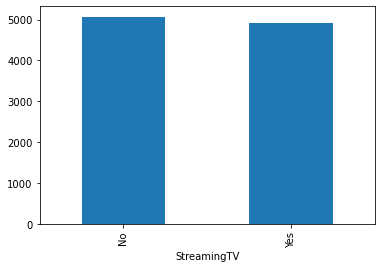

In [55]:
churn_df.groupby('StreamingTV').size().plot.bar()

<AxesSubplot:xlabel='StreamingMovies'>

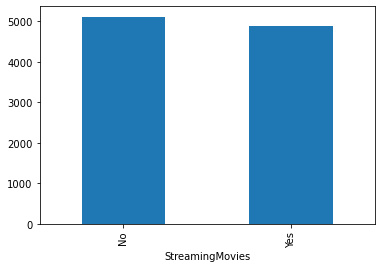

In [56]:
churn_df.groupby('StreamingMovies').size().plot.bar()

<AxesSubplot:xlabel='PaperlessBilling'>

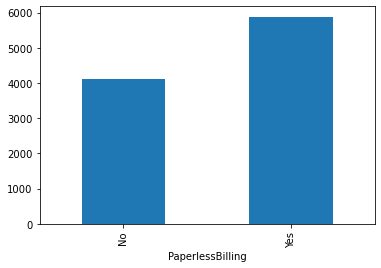

In [57]:
churn_df.groupby('PaperlessBilling').size().plot.bar()

<AxesSubplot:xlabel='PaymentMethod'>

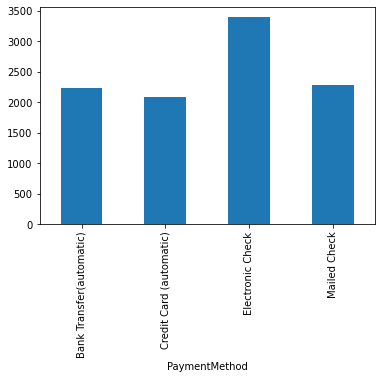

In [58]:
churn_df.groupby('PaymentMethod').size().plot.bar()

Creating dummy variables for Yes/No categorical variables before visualizing bivariate statistics

In [59]:
churn_df.dtypes

Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
Item1                     int64
Item2                     int64
Item3                     int64
Item4   

In [60]:
x1=['Marital','Gender','Contract','InternetService','PaymentMethod','Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
churn_df=pd.get_dummies(churn_df, prefix=x1, prefix_sep='_', dummy_na=False, columns=x1, drop_first=True)

Viewing column names after encoding

In [61]:
churn_df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary',
       'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes'],
      dtype='object')

Confirming all datatypes are numeric

In [62]:
churn_df.dtypes

Children                                   int64
Age                                        int64
Income                                   float64
Outage_sec_perweek                       float64
Email                                      int64
Contacts                                   int64
Yearly_equip_failure                       int64
Tenure                                   float64
MonthlyCharge                            float64
Bandwidth_GB_Year                        float64
Item1                                      int64
Item2                                      int64
Item3                                      int64
Item4                                      int64
Item5                                      int64
Item6                                      int64
Item7                                      int64
Item8                                      int64
Marital_Married                            uint8
Marital_Never Married                      uint8
Marital_Separated   

Previewing dataframe after encoding

In [63]:
churn_df.head(5)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0


#### Bivariate Statistics

Visualizing Bivariate Statistics

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Churn_Yes'>

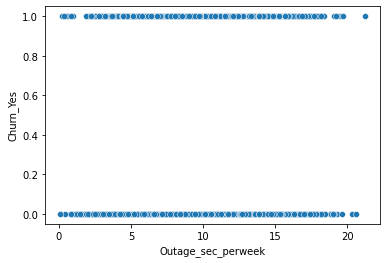

In [119]:
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Email', ylabel='Churn_Yes'>

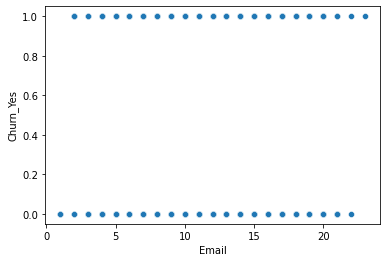

In [120]:
sns.scatterplot(x=churn_df['Email'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Contacts', ylabel='Churn_Yes'>

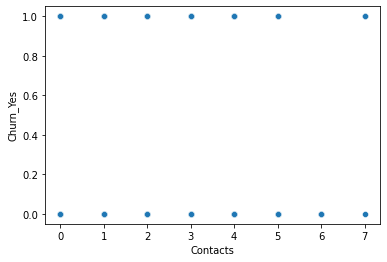

In [121]:
sns.scatterplot(x=churn_df['Contacts'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Churn_Yes'>

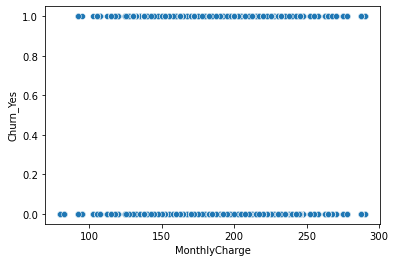

In [122]:
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Age', ylabel='Churn_Yes'>

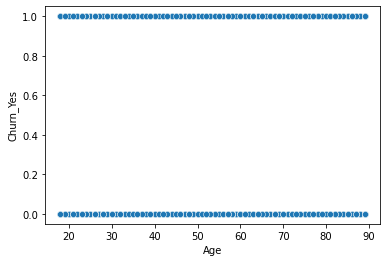

In [64]:
sns.scatterplot(x=churn_df['Age'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Income', ylabel='Churn_Yes'>

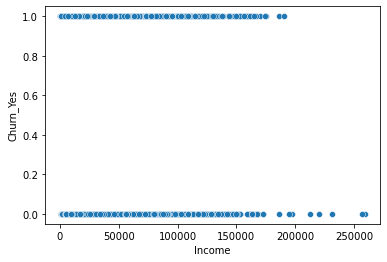

In [65]:
sns.scatterplot(x=churn_df['Income'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Children', ylabel='Churn_Yes'>

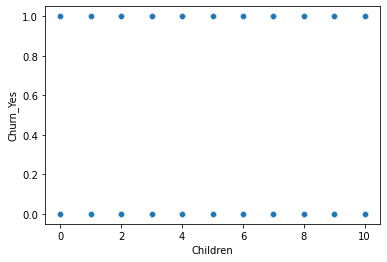

In [66]:
sns.scatterplot(x=churn_df['Children'], y=churn_df['Churn_Yes'])

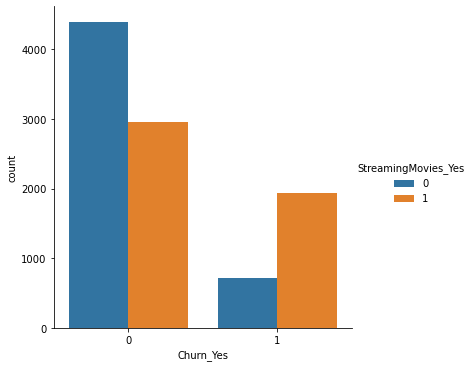

In [67]:
sns.catplot(x='Churn_Yes', hue='StreamingMovies_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

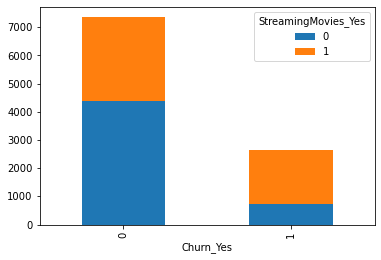

In [68]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","StreamingMovies_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["StreamingMovies_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Interestingly, those who streamed movies were more likely to churn.

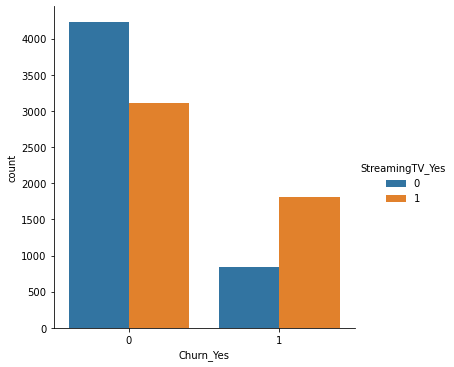

In [69]:
sns.catplot(x='Churn_Yes', hue='StreamingTV_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

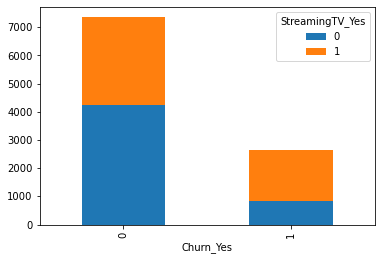

In [70]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","StreamingTV_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["StreamingTV_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Similarly, those who did streamed TV were more likely to churn. Streaming could be an area for further data analysis, as it could possibly be a factor in customer churn.

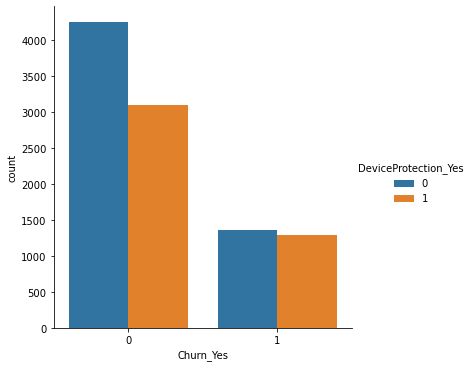

In [132]:
sns.catplot(x='Churn_Yes', hue='DeviceProtection_Yes', kind = 'count',data=churn_df)

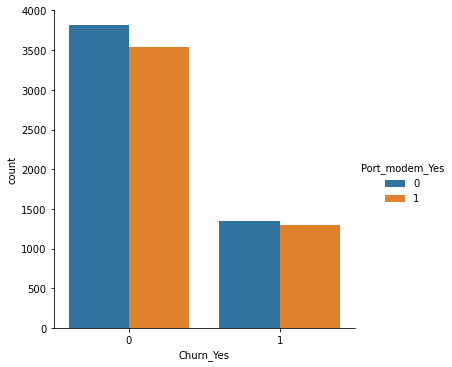

In [123]:
sns.catplot(x='Churn_Yes', hue='Port_modem_Yes', kind = 'count',data=churn_df)

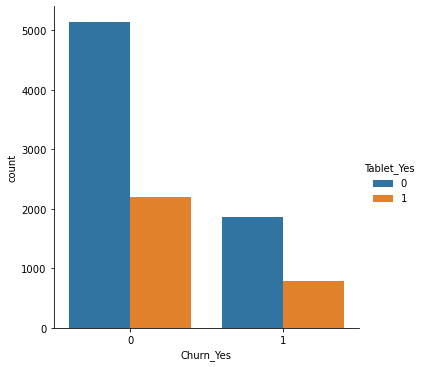

In [124]:
sns.catplot(x='Churn_Yes', hue='Tablet_Yes', kind = 'count',data=churn_df)

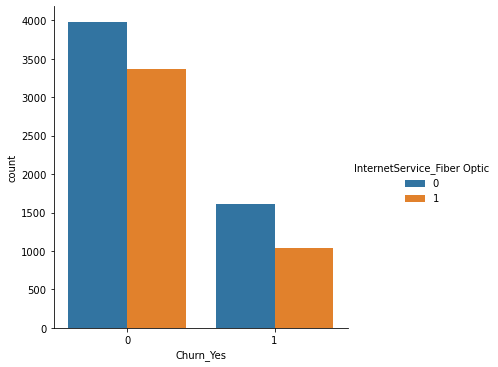

In [130]:
sns.catplot(x='Churn_Yes', hue='InternetService_Fiber Optic', kind = 'count',data=churn_df)

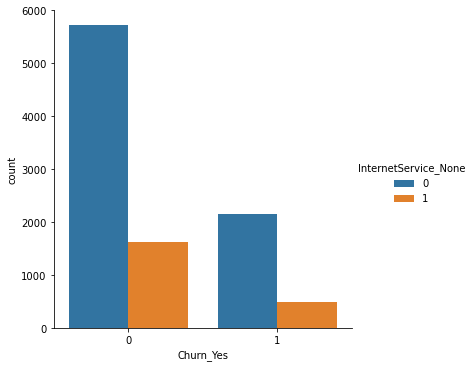

In [131]:
sns.catplot(x='Churn_Yes', hue='InternetService_None', kind = 'count',data=churn_df)

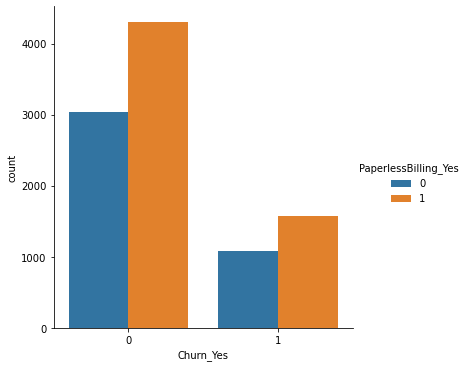

In [71]:
sns.catplot(x='Churn_Yes', hue='PaperlessBilling_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

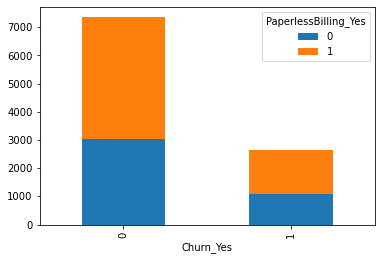

In [72]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","PaperlessBilling_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["PaperlessBilling_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

Paperless billing does not seem to affect churn.

<AxesSubplot:xlabel='Tenure', ylabel='Churn_Yes'>

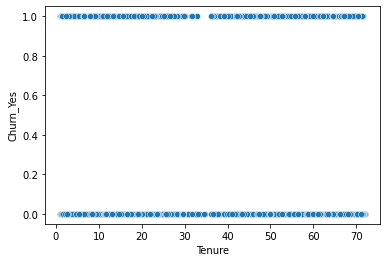

In [73]:
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Churn_Yes'>

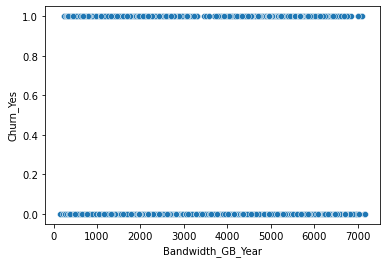

In [74]:
sns.scatterplot(x=churn_df['Bandwidth_GB_Year'], y=churn_df['Churn_Yes'])

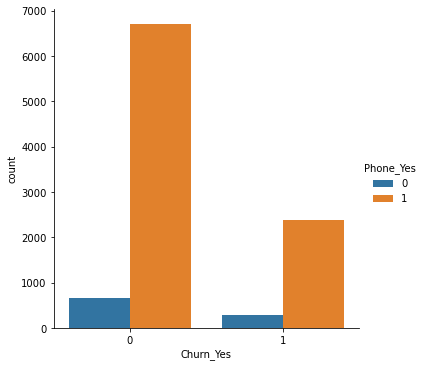

In [75]:
sns.catplot(x='Churn_Yes', hue='Phone_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

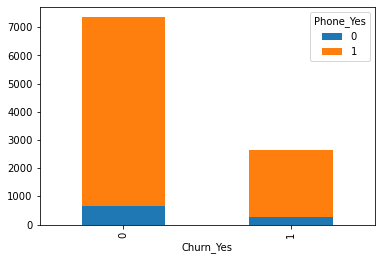

In [76]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Phone_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Phone_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Phone_Yes', ylabel='Churn_Yes'>

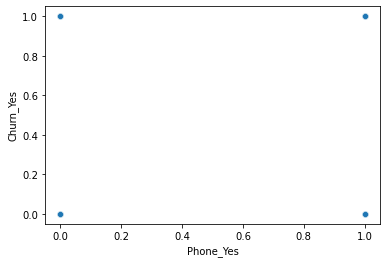

In [77]:
sns.scatterplot(x=churn_df['Phone_Yes'], y=churn_df['Churn_Yes'])

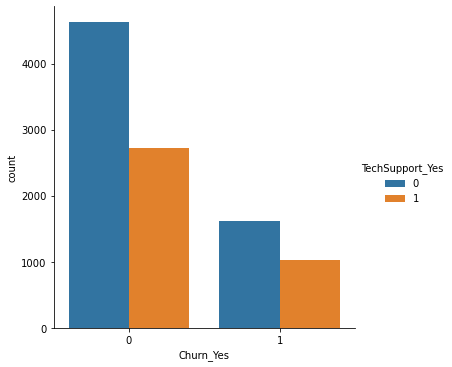

In [78]:
sns.catplot(x='Churn_Yes', hue='TechSupport_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

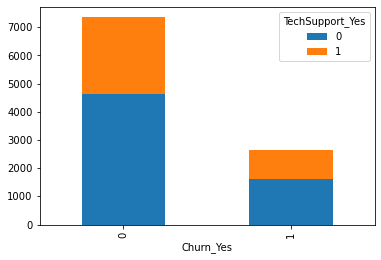

In [79]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","TechSupport_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["TechSupport_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='TechSupport_Yes', ylabel='Churn_Yes'>

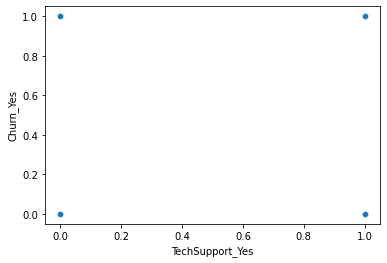

In [80]:
sns.scatterplot(x=churn_df['TechSupport_Yes'], y=churn_df['Churn_Yes'])

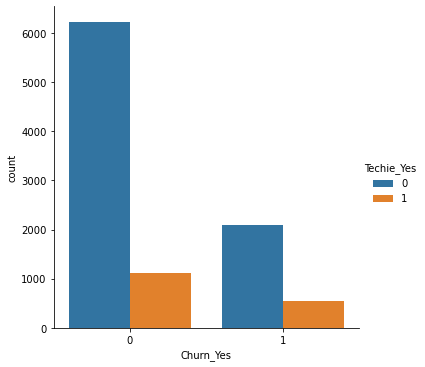

In [81]:
sns.catplot(x='Churn_Yes', hue='Techie_Yes', kind = 'count',data=churn_df)

<AxesSubplot:xlabel='Churn_Yes'>

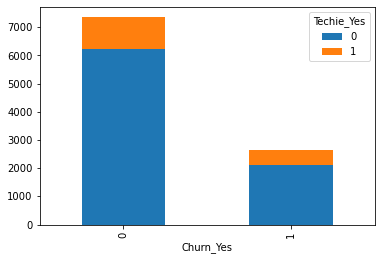

In [82]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Techie_Yes"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Techie_Yes"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Churn_Yes'>

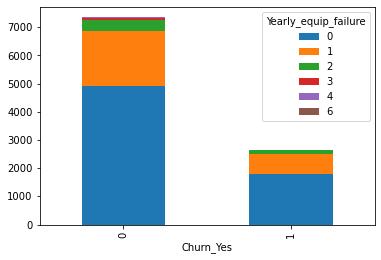

In [83]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Yearly_equip_failure"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Yearly_equip_failure"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='Churn_Yes'>

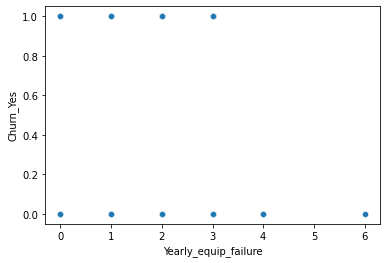

In [84]:
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

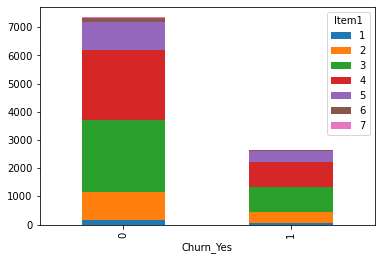

In [85]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item1"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item1"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item1', ylabel='Churn_Yes'>

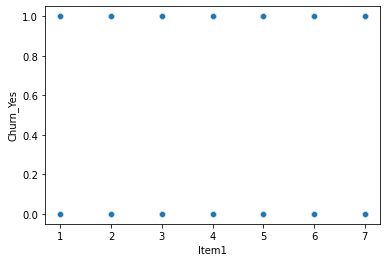

In [86]:
sns.scatterplot(x=churn_df['Item1'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

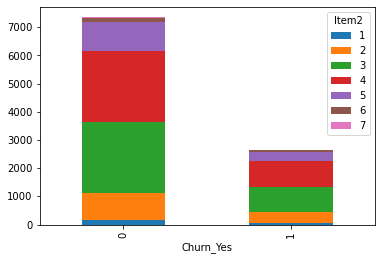

In [87]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item2"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item2"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item2', ylabel='Churn_Yes'>

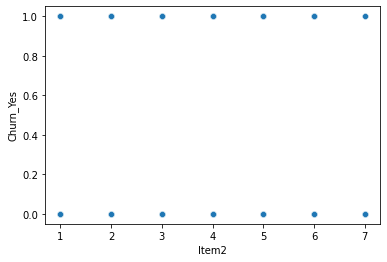

In [88]:
sns.scatterplot(x=churn_df['Item2'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

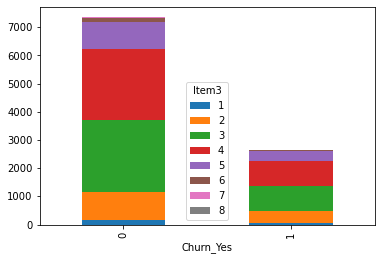

In [89]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item3"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item3"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item3', ylabel='Churn_Yes'>

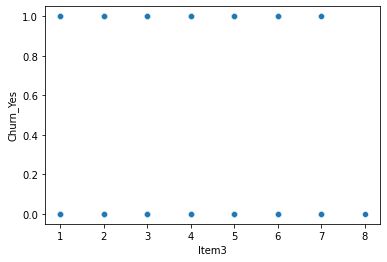

In [90]:
sns.scatterplot(x=churn_df['Item3'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

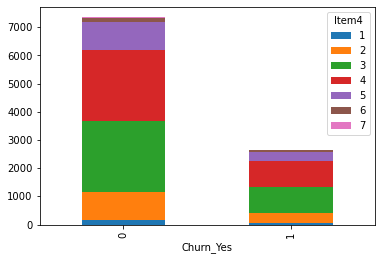

In [91]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item4"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item4"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item4', ylabel='Churn_Yes'>

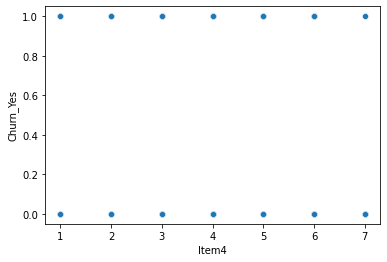

In [92]:
sns.scatterplot(x=churn_df['Item4'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

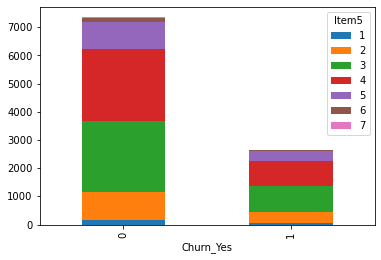

In [93]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item5"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item5"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item5', ylabel='Churn_Yes'>

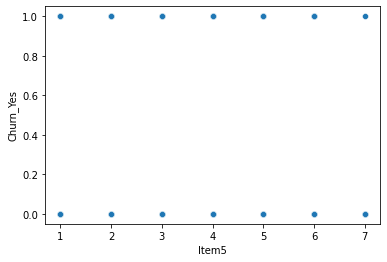

In [94]:
sns.scatterplot(x=churn_df['Item5'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

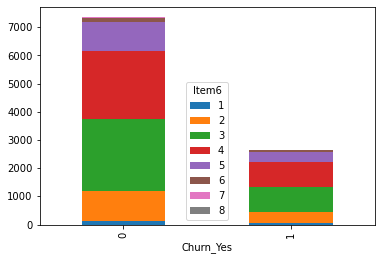

In [95]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item6"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item6"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item6', ylabel='Churn_Yes'>

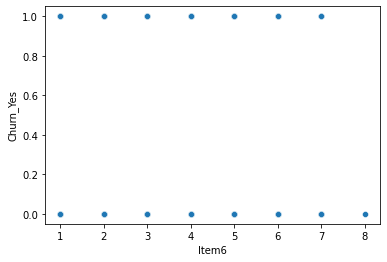

In [96]:
sns.scatterplot(x=churn_df['Item6'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

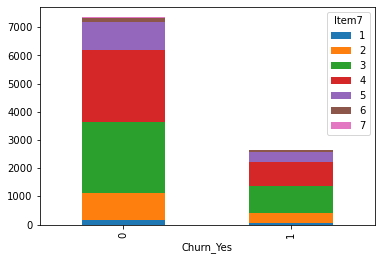

In [97]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item7"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item7"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item7', ylabel='Churn_Yes'>

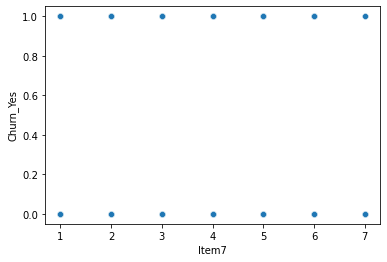

In [98]:
sns.scatterplot(x=churn_df['Item7'], y=churn_df['Churn_Yes'])

<AxesSubplot:xlabel='Churn_Yes'>

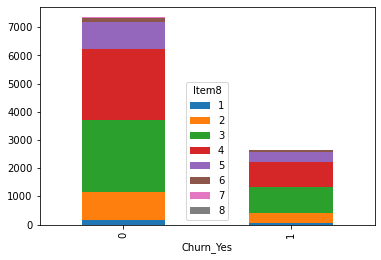

In [99]:
tbl=pd.pivot_table(churn_df.groupby(["Churn_Yes","Item8"]).size().reset_index(), values=0, index="Churn_Yes", columns=["Item8"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Item8', ylabel='Churn_Yes'>

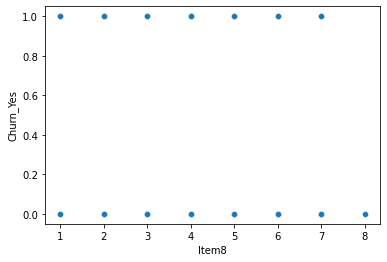

In [100]:
sns.scatterplot(x=churn_df['Item8'], y=churn_df['Churn_Yes'])

Based on the visualizations, survey data does not appear to be correlated with churn.

### C5. Copy of Prepared Data Set

In [101]:
churn_df.to_csv('churn_prepared_logistic_regression.csv')

## Part IV: Model Comparison and Analysis

### D1. Initial Logistic Regression Model

In [102]:
X=churn_df.drop('Churn_Yes', axis=1)
Y=churn_df[['Churn_Yes']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
lr_initial=LogisticRegression()
lr_initial=lr_initial.fit(X_train, y_train)

In [103]:
predictions_initial=lr_initial.predict(X_test)

In [104]:
score_initial = lr_initial.score(X_test, y_test)
print("Accuracy:", score_initial)

Accuracy: 0.8355


Confusion Matrix in Seaborn (Galarnyk, 2017)

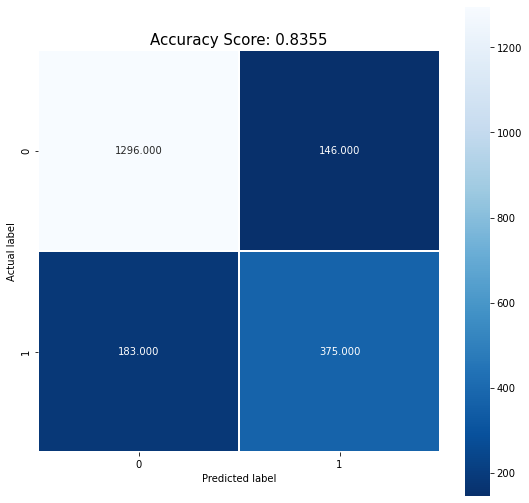

In [105]:
cm = metrics.confusion_matrix(y_test, predictions_initial)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_initial)
plt.title(all_sample_title, size = 15);
plt.savefig('Initial_Confusion_Matrix.png')
plt.show();

In [106]:
print(classification_report(y_test, predictions_initial))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1442
           1       0.72      0.67      0.70       558

    accuracy                           0.84      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.83      0.84      0.83      2000



In [107]:
lr_sm_initial=sm.Logit(y_train, X_train).fit()
print(lr_sm_initial.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7957
Method:                           MLE   Df Model:                           42
Date:                Fri, 23 Sep 2022   Pseudo R-squ.:                     inf
Time:                        13:38:06   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Children                                  0.4122      0.065

### D2. Variable Selection Procedure and Model Evaluation Metric to Reduce Initial Model

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
Children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236,0.005260,-0.002647,0.000508,-0.000321,0.005125,0.002400,0.011277,0.017653,-0.003150,0.007314,0.005771,0.003441,-0.003750,-0.004264,-0.006884,0.011283,0.001494,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828
Age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193,-0.005491,0.005879,-0.006444,-0.005371,0.005332,-0.019108,-0.005215,-0.007326,0.001240,0.003766,-0.000372,0.000588,-0.020795,0.005630,-0.007531,0.006081,-0.004384,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247
Income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740,0.009022,0.003758,-0.010934,-0.000360,-0.023870,0.006300,0.002225,-0.003964,-0.016990,-0.001261,-0.005798,0.003597,0.014535,0.005937,0.005442,-0.014977,0.005999,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126,0.016806,-0.020134,0.007104,-0.013863,0.010859,-0.001960,-0.005584,0.015318,0.004552,0.007797,0.011445,0.004995,-0.009557,-0.000156,-0.006264,0.006326,0.005614,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857,0.009450,0.000475,0.002783,-0.002995,0.013707,-0.008513,-0.013516,0.004072,0.002827,-0.001216,0.017390,-0.009167,0.001759,0.012326,-0.014047,0.014196,-0.008579,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615,0.001051,0.006464,-0.012442,0.004217,0.001725,0.000902,-0.002684,0.007810,0.003987,-0.016473,0.003508,-0.004548,-0.019917,0.008567,0.005343,-0.002219,-0.011855,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859,-0.002231,0.004167,-0.017477,0.012617,0.000909,0.025188,0.011734,-0.007290,-0.004556,-0.001668,0.007344,0.016798,-0.016624,-0.015927,-0.008516,0.005686,0.003634,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473,0.016603
Tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347,0.005189,0.002887,0.001125,-0.000656,-0.010922,-0.010902,-0.006127,0.019495,-0.003820,-0.010098,0.011513,-0.002885,0.006218,-0.485475,-0.010041,0.008764,0.000544,0.003256,-0.010422,0.002508,0.020

<AxesSubplot:>

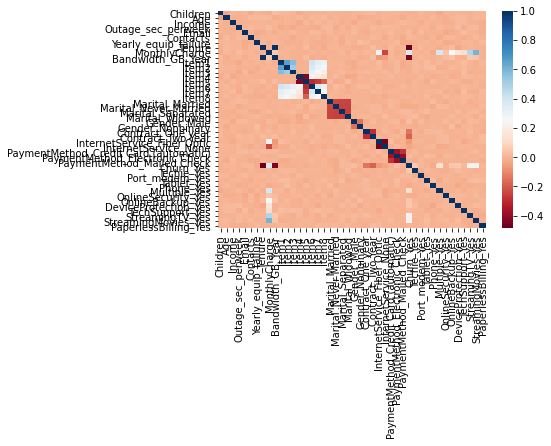

In [108]:
corr=churn_df.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

Interestingly, Bandwith_GB_Year is highly correlated with Tenure, the correlation is .99. This was an unexpected correlation. They will be removed in feature reduction.

**Reviewing P-Values to reduce the model**

In [109]:
print(lr_sm_initial.summary())

                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7957
Method:                           MLE   Df Model:                           42
Date:                Fri, 23 Sep 2022   Pseudo R-squ.:                     inf
Time:                        13:38:08   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Children                                  0.4122      0.065      6.314      0.000       0.284       0.540
Age                                      -0.0427  

After reviewing the P-values above, the variables with p-values greater than 0.05 will be removed. 

In [110]:
churn_df_reducing=churn_df.drop(['Income', 'Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Item1','Item2','Item3','Item4',
                                 'Item5','Item6','Item7','Item8','Marital_Married','Marital_Never Married','Marital_Separated','PaymentMethod_Credit Card (automatic)',
                                 'PaymentMethod_Mailed Check','Port_modem_Yes','Tablet_Yes','Phone_Yes','Multiple_Yes','PaperlessBilling_Yes','Tenure','Bandwidth_GB_Year'], axis=1)

In [111]:
X=churn_df_reducing.drop('Churn_Yes', axis=1)
Y=churn_df_reducing[['Churn_Yes']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
lr_reducing=LogisticRegression()
lr_reducing.fit(X_train, y_train)
predictions_reducing=lr_reducing.predict(X_test)
lr_sm_reducing=sm.Logit(y_train, X_train).fit()
print(lr_sm_reducing.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7982
Method:                           MLE   Df Model:                           17
Date:                Fri, 23 Sep 2022   Pseudo R-squ.:                     inf
Time:                        13:38:08   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Children                          -0.0447      0.014     -3.285      0.00

Once again reducing based on p-values.

In [112]:
churn_df_reduced=churn_df_reducing.drop(['Marital_Widowed','Gender_Male','Gender_Nonbinary','PaymentMethod_Electronic Check','TechSupport_Yes'], axis=1)

In [113]:
X=churn_df_reduced.drop('Churn_Yes', axis=1)
Y=churn_df_reduced[['Churn_Yes']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
lr_reduced=LogisticRegression()
lr_reduced.fit(X_train, y_train)
predictions_reduced=lr_reduced.predict(X_test)
lr_sm_reduced=sm.Logit(y_train, X_train).fit()
print(lr_sm_reduced.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           12
Date:                Fri, 23 Sep 2022   Pseudo R-squ.:                     inf
Time:                        13:38:09   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                       -0.0453      0.014     -3.334      0.001      -0

All p-values are now below 0.05.

### D3. Reduced Logistic Regression Model

In [114]:
X=churn_df_reduced.drop('Churn_Yes', axis=1)
Y=churn_df_reduced[['Churn_Yes']]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=.20, random_state=1)
lr_final=LogisticRegression()
lr_final.fit(X_train, y_train)
predictions_final=lr_final.predict(X_test)

In [115]:
score_final = lr_final.score(X_test, y_test)
print("Accuracy:", score_final)

Accuracy: 0.779


In [116]:
print(classification_report(y_test, predictions_final))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1442
           1       0.68      0.40      0.50       558

    accuracy                           0.78      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.76      0.78      0.76      2000



Confusion Matrix in Seaborn (Galarnyk, 2017)

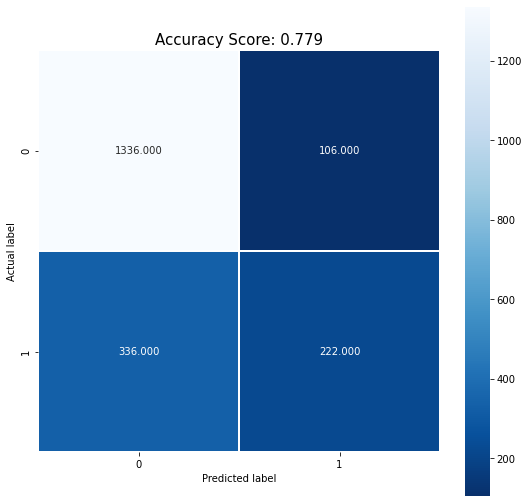

In [117]:
cm = metrics.confusion_matrix(y_test, predictions_final)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_final)
plt.title(all_sample_title, size = 15);
plt.savefig('Final_Confusion_Matrix.png')
plt.show();

### E1. Comparison of Initial and Reduced Logistic Regression Models

Measuring Model Performances (Galarynk, 2017)

In [118]:
print("Initial Model Accuracy:", score_initial)
print("Reduced Model Accuracy:", score_final)

Initial Model Accuracy: 0.8355
Reduced Model Accuracy: 0.779


The reduced logistic regression model was able to maintain nearly as high of an accuracy score as the initial logistic regression model. Benefiting from this reduced model, the stakeholders can use 14 features to predict whether or not a subscriber will churn, rather than the over 40 features in the initial logistic regression model. Of the 2,000 test samples, the reduced logistic regression model accurately predicted 1,558 of the samples. It incorrectly predicted 442 of the samples.  Looking closer at the results of the reduced logistic regression model, 222 were true positives, 1,336 were true negatives. 106 were false positives, and 336 were false negatives. 

The reduced logistic regression model had an accuracy of 77.9%, compared to the initial logistic regression model that had 83.6% accuracy. That is not a large reduction in accuracy compared to the large number of features that were reduced.

### E2. Output of Analysis and Confusion Matrix

*See output, code and confusion matrices above.*

### E3. Code used to support implementation of the Logistic Regression Models

*Please see code above.*

## Part V: Data Summary and Implications

### F1. Results of Data Analysis

#### Regression Equation for the Reduced Model

y = -0.0453(Children) -0.0134(Age) -0.0057(MonthlyCharge) -1.6884(Contract_One year) -1.7619(Contract_Two Year) -0.6905(InternetService_Fiber Optic) -0.9065(InternetService_None) 
    + 0.3995(Techie_Yes) -0.2463(OnlineSecurity_Yes) + 0.2525(OnlineBackup_Yes) + 0.1969(DeviceProtection_Yes) + 1.4579(StreamingTV_Yes) + 1.7544(StreamingMovies_Yes)

#### Interpretation of Coefficients of the Statistically Significant Variables;Statistical and Practical Significance of the Model

Features in the Reduced Logistic Regression Model and their respective coefficients:

    Children                       -0.0453
    Age                            -0.0134
    MonthlyCharge                  -0.0057
    Contract_One year              -1.6884
    Contract_Two Year              -1.7619
    InternetService_Fiber Optic    -0.6905
    InternetService_None           -0.9065
    Techie_Yes                      0.3995
    OnlineSecurity_Yes             -0.2463
    OnlineBackup_Yes                0.2525
    DeviceProtection_Yes            0.1969
    StreamingTV_Yes                 1.4579
    StreamingMovies_Yes             1.7544

The features with the largest coefficients, and thus the greatest predictive features of whether or not a subscriber would churn based on the provided dataset were: Contract_One year, Contract_Two Year, StreamingTV_Yes, and StreamingMovies_Yes.  The subscribers who have one and two year contracts are predicted to churn less. This makes sense, as a subscriber who is month-to-month and not tied into a year or two year long contract is more likely to leave the service.  Interestingly, the subscribers who streamed television and movies were more likely to churn. This is an area for further research and data analysis by the company.

The features above in the reduced logistic regression model that had the least impact on subscriber churn were MonthlyCharge, Age, and Children. It is more important for the stakeholders to focus on the previously mentioned features than these.

#### Limitations of Data Analysis

The provided dataset is not very large. If the dataset were larger, or more customer variables were provided the generated model could possibly be more accurate. 

### F2. Recommended Course of Action

The stakeholders, in wanting to reduce subscriber churn, should focus on converting as many customers to one or two year contracts as possible. This will reduce churn. Additionally, the stakeholders should research and figure out why the subscribers who streamed television and movies were more likely to churn.  There could be some issue with that feature that is causing subscribers to leave.

### Code Sources

Galarnyk, M. (2017, September 13). *Logistic regression using Python (scikit-learn).* Towards Data Science. Retrieved from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Reed, A. (2019, November 23). *Multivariate Regression Analysis.* GitHub. Retrieved from https://github.com/areed1192/sigma_coding_youtube/blob/a4e8df97856ad224664254fa726ac56cbee4dc57/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb 

Villazon, A. (2020). *Logistic regression in Python with statsmodels.* Andrew Villazon. Retrieved from https://www.andrewvillazon.com/logistic-regression-python-statsmodels/?fbclid=IwAR0qtFijLFLN5UpgY481x4na10ZIsWv7_pCHhFyZHjP84Lonk9hM51yN1aI#logistic-regression-with-statsmodels

### Additional Sources

Bobbit, Z. (2020, October 13). *The 6 assumptions of logistic regression.* Statology. Retrieved from https://www.statology.org/assumptions-of-logistic-regression/

Larose, C.D., & Larose, D.T. (2019). *Data science using Python and R.* John Wiley & Sons.

Vallisneri, M. (2018). *Python statistics essential training.* LinkedIn Learning.
https://www.linkedin.com/learning/python-statistics-essential-training/the-structure-of-data?u=2045532